# Book - Prepare rules for the all the data sets

1) Try different values of support and confidence. 
Observe the change in number of rules for different support,confidence values

2) Change the minimum length in apriori algorithm

3) Visulize the obtained rules using different plots 

In [2]:
import pandas as pd
import numpy as np
book = pd.read_csv("book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [3]:
book.head(2)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [4]:
book.columns

Index(['ChildBks', 'YouthBks', 'CookBks', 'DoItYBks', 'RefBks', 'ArtBks',
       'GeogBks', 'ItalCook', 'ItalAtlas', 'ItalArt', 'Florence'],
      dtype='object')

In [5]:
book.count().sum()

22000

In [6]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
book.dtypes

ChildBks     int64
YouthBks     int64
CookBks      int64
DoItYBks     int64
RefBks       int64
ArtBks       int64
GeogBks      int64
ItalCook     int64
ItalAtlas    int64
ItalArt      int64
Florence     int64
dtype: object

In [8]:
book.shape

(2000, 11)

In [9]:
book.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

# APRIOR - ALGORITHM

In [16]:
from mlxtend.frequent_patterns import apriori
freq_item = apriori(book, min_support = 0.1,use_colnames=False)
freq_item

,support,itemsets
0,0.4230,(0)
1,0.2475,(1)
2,0.4310,(2)
3,0.2820,(3)
4,0.2145,(4)
5,0.2410,(5)
6,0.2760,(6)
7,0.1135,(7)
8,0.1085,(10)
9,0.1650,"(0, 1)"


In [17]:
freq_item = apriori(book, min_support=0.1, use_colnames= True, verbose=1)
freq_item.head()

Processing 44 combinations | Sampling itemset size 4


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


In [19]:
from mlxtend.frequent_patterns import association_rules
asso_rule = association_rules(freq_item, metric= "confidence", min_threshold=0.4)
asso_rule.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(CookBks),0.4230,0.431,0.256,0.605201,1.404179,0.073687,1.441240
2,(CookBks),(ChildBks),0.4310,0.423,0.256,0.593968,1.404179,0.073687,1.421069
3,(DoItYBks),(ChildBks),0.2820,0.423,0.184,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(DoItYBks),0.4230,0.282,0.184,0.434988,1.542511,0.064714,1.270770


In [20]:
asso_rule[(asso_rule.support > 0.015) & (asso_rule.confidence > 0.4)].sort_values("confidence", ascending = False).shape

(70, 9)

In [21]:
asso_rule['lhs items'] = asso_rule['antecedents'].apply(lambda x:len(x) )

In [22]:
asso_rule[asso_rule['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
57,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
59,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
68,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
66,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
41,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


In [23]:
asso_rule['antecedents_'] = asso_rule['antecedents'].apply(lambda a: ','.join(list(a)))

In [24]:
asso_rule['consequents_'] = asso_rule['consequents'].apply(lambda a: ','.join(list(a)))

In [25]:
pivot = asso_rule[asso_rule['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'confidence')

Text(0.5, 1.0, 'Confidence Metric heat map')

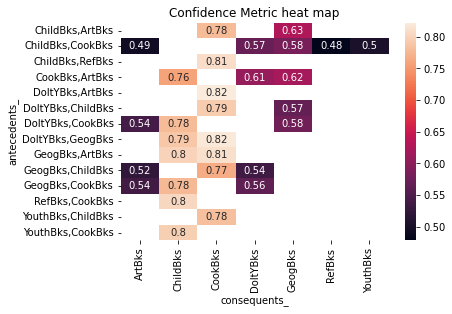

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(pivot, annot = True)
plt.title('Confidence Metric heat map')

In [30]:
asso_rule_lift = association_rules(freq_item, metric="lift", min_threshold=0.6)
asso_rule_lift.shape

(100, 9)


In [31]:
asso_rule_lift['lhs items'] = asso_rule_lift['antecedents'].apply(lambda x:len(x) )
asso_rule_lift[asso_rule_lift['lhs items']>1].sort_values('lift', ascending=False).head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,lhs items
78,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628,2
82,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797,2
96,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063,2
94,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657,2
53,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277,2


In [33]:
asso_rule_lift['antecedents_'] = asso_rule_lift['antecedents'].apply(lambda a: ','.join(list(a)))

In [34]:
asso_rule_lift['consequents_'] = asso_rule_lift['consequents'].apply(lambda a: ','.join(list(a)))

In [35]:
pivot = asso_rule_lift[asso_rule_lift['lhs items']>1].pivot(index = 'antecedents_', columns = 'consequents_', values= 'lift')

Text(0.5, 1.0, 'Lift Metric heat map')

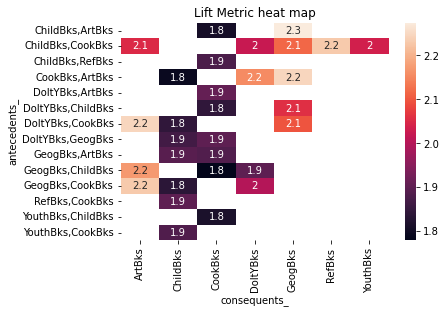

In [36]:
sns.heatmap(pivot, annot = True)
plt.title('Lift Metric heat map')